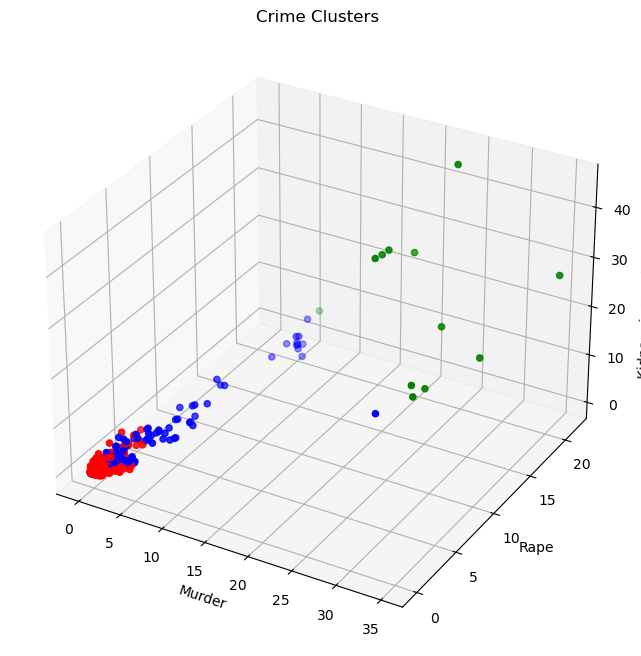

                     Murder        Rape  Kidnapping and Abduction   Dacoity  \
ClusterLabel                                                                  
Moderate Areas    41.939759  106.048193                 22.409639  3.240964   
Peaceful Areas   280.666667  320.250000                183.000000  4.250000   
Sensitive Areas    1.003138    2.150846                  0.593746  0.052673   

                   Robbery      Arson        Hurt  \
ClusterLabel                                        
Moderate Areas    7.060241  19.807229  417.373494   
Peaceful Areas   18.583333  63.750000  497.416667   
Sensitive Areas   0.122941   0.339012    6.466323   

                 Prevention of atrocities (POA) Act  \
ClusterLabel                                          
Moderate Areas                           872.144578   
Peaceful Areas                          2151.666667   
Sensitive Areas                           16.913594   

                 Protection of Civil Rights (PCR) Act  \
Clust

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

crime_data = pd.read_csv('02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')

# Select relevant features for clustering
selected_features = [
    "Murder", "Rape", "Kidnapping and Abduction", "Dacoity",
    "Robbery", "Arson", "Hurt", "Prevention of atrocities (POA) Act",
    "Protection of Civil Rights (PCR) Act", "Other Crimes Against SCs",
    "Total Crimes Against SCs"
]

# Extract selected features from the dataset
X = crime_data[selected_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (you can use the elbow method)
# Let's say you decide on 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
crime_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters (assuming you have a 3D plot)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = {0: 'red', 1: 'blue', 2: 'green'}
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=crime_data['Cluster'].map(colors))

ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel(selected_features[2])
ax.set_title('Crime Clusters')

plt.show()

# Analyze the clusters and assign labels
cluster_labels = ['Sensitive Areas', 'Moderate Areas', 'Peaceful Areas']
crime_data['ClusterLabel'] = crime_data['Cluster'].map({i: cluster_labels[i] for i in range(len(cluster_labels))})

# Print the cluster details
cluster_details = crime_data.groupby('ClusterLabel').mean()[selected_features]
print(cluster_details)


In [30]:
import pandas as pd
from sklearn.cluster import KMeans

features = crime_data[[ 'Murder', 'Rape', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act', 'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs', 'Total Crimes Against SCs']]

# Create and fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
crime_data['Cluster'] = kmeans.fit_predict(features)

# Create DataFrames for each cluster
cluster_0_df = crime_data[crime_data['Cluster'] == 0]
cluster_1_df = crime_data[crime_data['Cluster'] == 1]
cluster_2_df = crime_data[crime_data['Cluster'] == 2]

# Display all rows in each cluster DataFrame
print("Cluster 0 DataFrame:")
print(cluster_0_df)

print("\nCluster 1 DataFrame:")
print(cluster_1_df)

print("\nCluster 2 DataFrame:")
print(cluster_2_df)


Cluster 0 DataFrame:
       STATE/UT Name  District Name  Year  Murder  Rape  \
0     ANDHRA PRADESH       ADILABAD  2001       0     1   
1     ANDHRA PRADESH      ANANTAPUR  2001       0     4   
2     ANDHRA PRADESH       CHITTOOR  2001       3     3   
3     ANDHRA PRADESH       CUDDAPAH  2001       0     3   
4     ANDHRA PRADESH  EAST GODAVARI  2001       1     3   
...              ...            ...   ...     ...   ...   
9013     LAKSHADWEEP    LAKSHADWEEP  2012       0     0   
9014     LAKSHADWEEP          TOTAL  2012       0     0   
9015      PUDUCHERRY       KARAIKAL  2012       1     0   
9016      PUDUCHERRY     PUDUCHERRY  2012       1     0   
9017      PUDUCHERRY          TOTAL  2012       2     0   

      Kidnapping and Abduction  Dacoity  Robbery  Arson  Hurt  \
0                            4        0        0      0     3   
1                            0        0        0      0    49   
2                            0        0        0      0    38   
3         

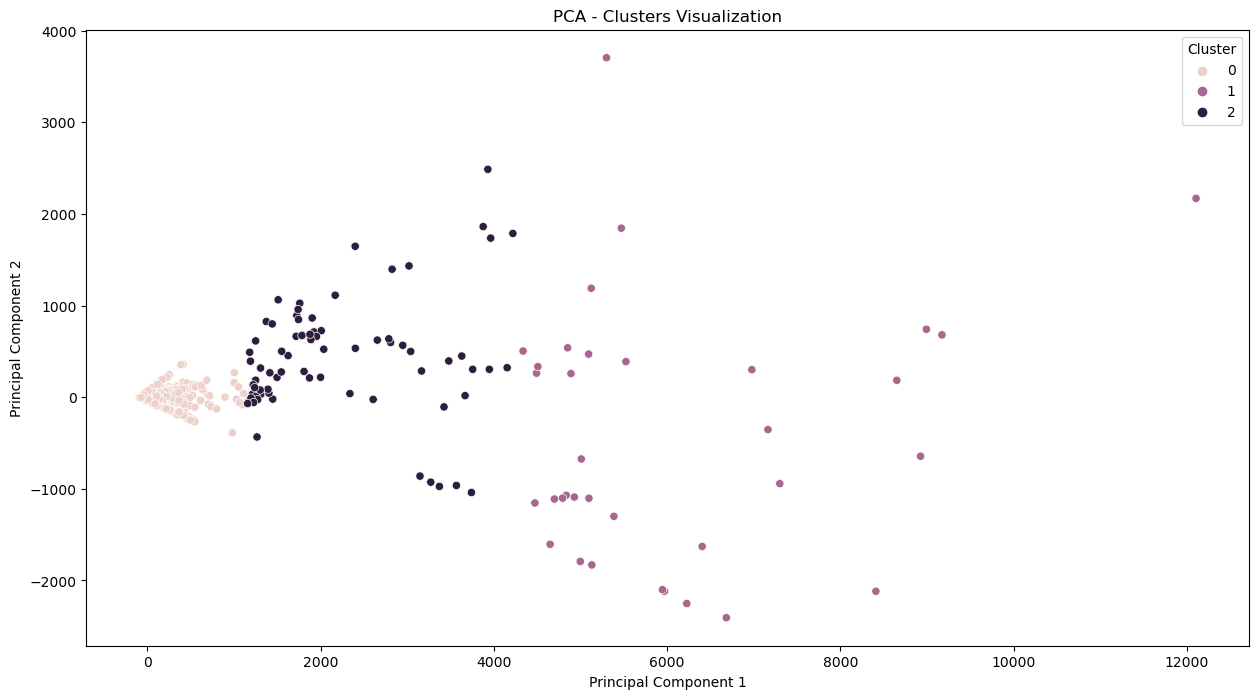

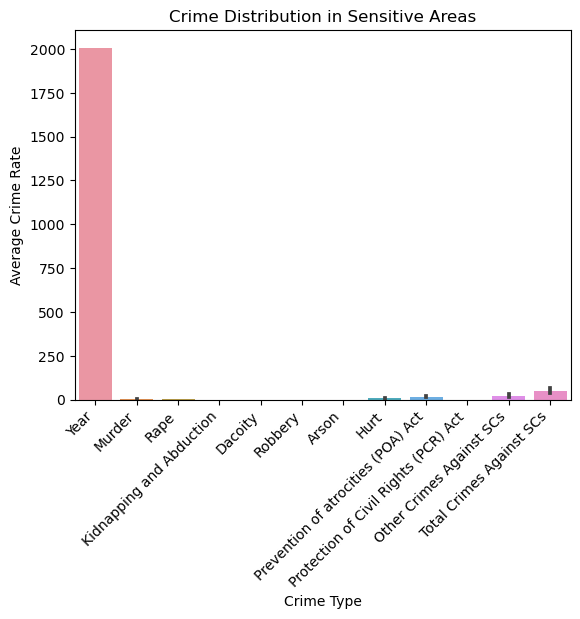

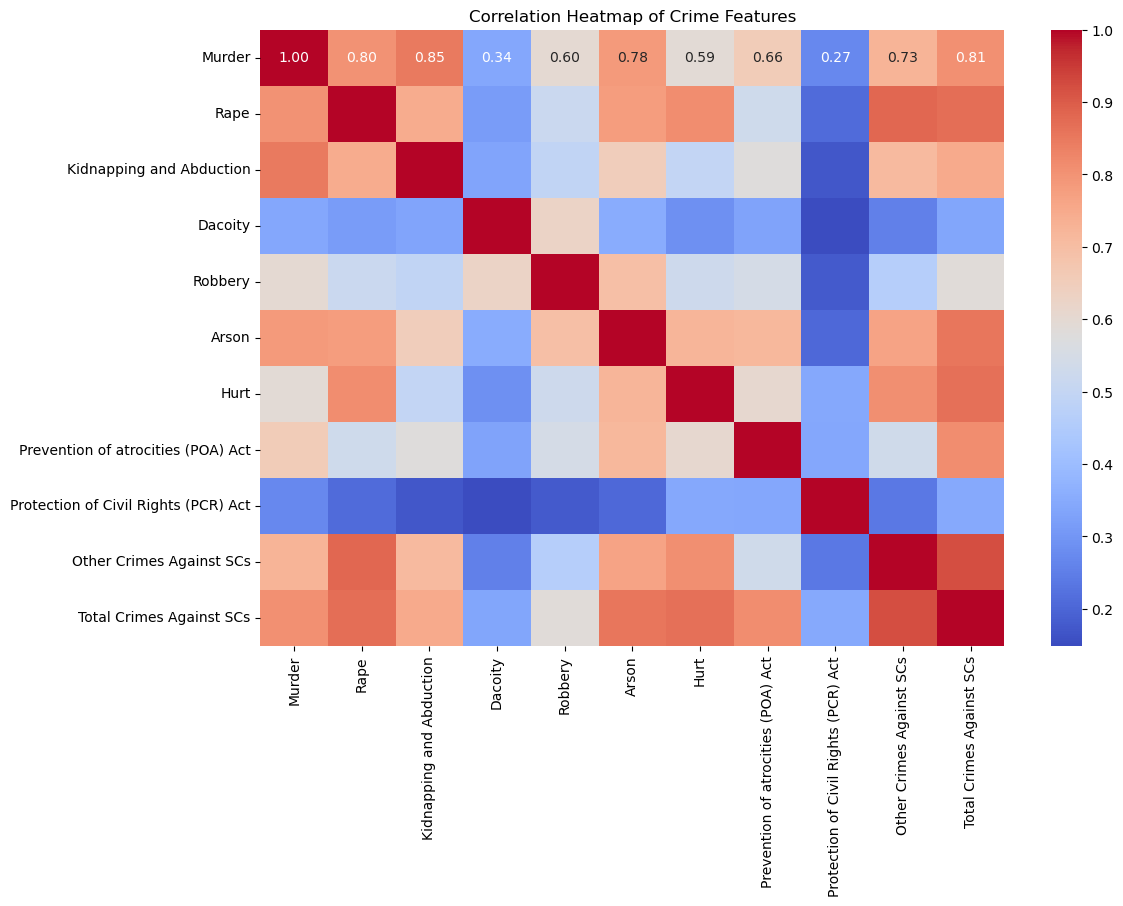

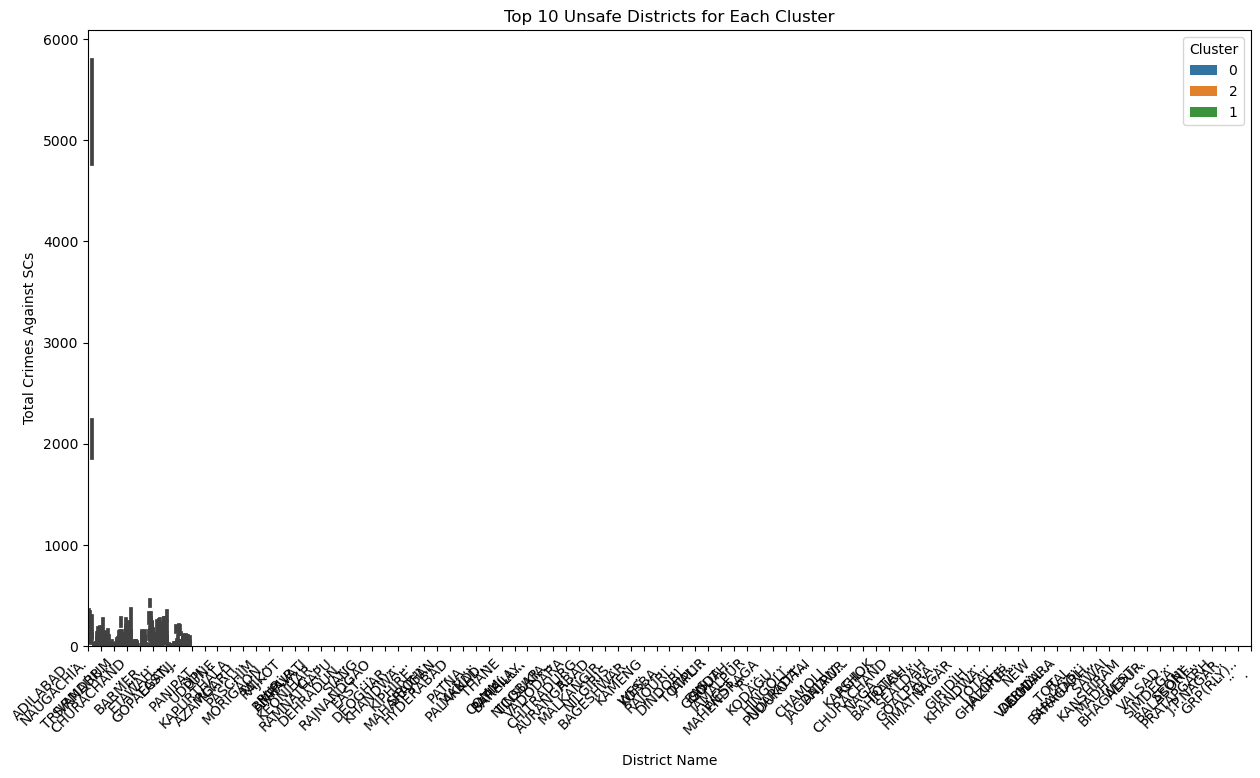

In [55]:
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

# Assuming 'crime_data' is your DataFrame
crime_data = pd.read_csv('02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')
features = crime_data[['District Name', 'Murder', 'Rape', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act', 'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs', 'Total Crimes Against SCs']]
 
# Select only numeric columns for clustering
numeric_features = features.select_dtypes(include=[np.number])

# Perform KMeans clustering on numeric features
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
crime_data['Cluster'] = kmeans.fit_predict(numeric_features)

# Principal Component Analysis (PCA) for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_features)
pc_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pc_df['Cluster'] = crime_data['Cluster']

# Visualize Clusters
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pc_df)
plt.title('PCA - Clusters Visualization')
plt.show()

# Convert 'District Name' to string
crime_data['District Name'] = crime_data['District Name'].astype(str)

# Analyzing Cluster Characteristics
cluster_characteristics = crime_data.groupby(['Cluster', 'District Name']).mean()

# Reset index to make 'District Name' a regular column
cluster_characteristics = cluster_characteristics.reset_index()

# Add the following line to transpose cluster_characteristics
cluster_characteristics_transposed = cluster_characteristics.copy()

# Melt the DataFrame to have 'Crime Type', 'Cluster', and 'Average Crime Rate' columns
melted_data = cluster_characteristics_transposed.melt(id_vars=['Cluster', 'District Name'], var_name='Crime Type', value_name='Average Crime Rate')

# Convert Cluster to string
melted_data['Cluster'] = melted_data['Cluster'].astype(str)

# 1. What is impacting more crimes in sensitive areas?
# Plotting crime distribution in sensitive areas
sns.barplot(x='Crime Type', y='Average Crime Rate', data=melted_data)
plt.title('Crime Distribution in Sensitive Areas')
plt.xlabel('Crime Type')
plt.ylabel('Average Crime Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. What needs to be done to reduce crime?
# Calculate correlation matrix
correlation_matrix = crime_data[features.columns].corr()

# Plotting correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Crime Features')
plt.show()

# Convert 'Cluster' to string
crime_data['Cluster'] = crime_data['Cluster'].astype(str)

import textwrap

# Abbreviate district names
abbreviated_names = [name[:10] + '...' for name in crime_data['District Name']]

# Wrap text to create multiline effect
wrapped_labels = ['\n'.join(textwrap.wrap(name, width=10)) for name in abbreviated_names]

# Plotting the bar chart
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='District Name', y='Total Crimes Against SCs', hue='Cluster', data=crime_data)

# Set xticks and labels
xtick_positions = range(0, len(crime_data), 100)  # Adjust step size as needed
xtick_labels = [wrapped_labels[i] for i in xtick_positions]
# 3. Most safe and unsafe districts
plt.title('Top 10 Unsafe Districts for Each Cluster')
plt.xlabel('District Name')
plt.ylabel('Total Crimes Against SCs')
ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
plt.legend(title='Cluster', loc='upper right')
plt.show()
